<a href="https://colab.research.google.com/github/HenriARM/ML/blob/master/digit-recognition-numpy-ffnn/digit-recognition-numpy-ffnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy
# for the sigmoid function expit()
import scipy.special
import matplotlib.pyplot
# ensure the plots are inside this notebook, not in an external window
%matplotlib inline

In [0]:
class Network:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        
        # wih - input-hidden layers weight matrice[hidden_nodes][input_nodes]
        # who - hidden-output layers weight matrice
        # wih[i,j] - weight of connection between hidden layer's i-th node and input layer's j-th node
        # to create initial weights, good approach is to give them all 1/√(number of incoming links)
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learning_rate
        
        # activation function is the sigmoid function
        ## S(x)={{1}/{1+e^{-x}}}
        self.activation_function = lambda x: scipy.special.expit(x)
        pass

    
   
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # do same thing as test method
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error = target value - final_output
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # test the neural network
    def test(self, inputs_list):
        
        # this line converts a python list to a numpy array.
        # by default it will have dimensions [list_size, undefined]. 
        # by setting ndmin=2, it forces the dimensions to be [list_size, 1], 
        # which avoids any problems later using multiplication.
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # call activation function
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [0]:
# Input data
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1

# create instance of neural network
n = Network(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [0]:
# load MNIST
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [0]:
len(training_data_list)

60000

In [0]:
# train the neural network

# epochs is the number of times the training data set is used
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # csv file consist from 0 to 255 values, which we convert from 0.01 to 1
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        # fill targets array with 0.01 probability for all digits, 
        # except the target digit, which is located in 0-th 
        # in training function is used to 
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [0]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [0]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # test the network
    outputs = n.test(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [0]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9736


In [0]:
len(test_data_list)

10000

Target value is =  9
Output value is =  9 

Probability for being digit 0 is 1% ( 0.006135617975703657 )
Probability for being digit 1 is 0% ( 0.0036383640175907867 )
Probability for being digit 2 is 1% ( 0.005204710284055683 )
Probability for being digit 3 is 0% ( 0.0013491513924802228 )
Probability for being digit 4 is 1% ( 0.005706648130977631 )
Probability for being digit 5 is 0% ( 0.0003909270816447585 )
Probability for being digit 6 is 0% ( 0.004412951901380531 )
Probability for being digit 7 is 0% ( 0.003670141799703421 )
Probability for being digit 8 is 1% ( 0.008196844860717053 )
Probability for being digit 9 is 99% ( 0.9944163818998565 )


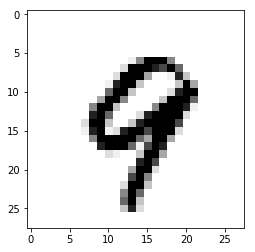

In [0]:
    record = test_data_list[281];
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.test(inputs)
    label = numpy.argmax(outputs)
    
    image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
    matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
    print("Target value is = ", correct_label)
    print("Output value is = ", label, "\n")
    
    for index, val in enumerate(outputs.ravel()):
        print("Probability for being digit", index, "is", "{0:.0%}".format(val), "(", val, ")")    

In [0]:
print(n.wih[50,50])

-0.014910899713675341


In [0]:
print(numpy.array([1,2,3], ndmin=2))

[[1 2 3]]


In [0]:
print(numpy.array([1,2,3], ndmin=2).T)

[[1]
 [2]
 [3]]
